In [2]:
# Import Dependencies
%matplotlib inline

# Standard Python Imports
import math, time, random, datetime

# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
sns.set_theme()

# preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# machine learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import train & test data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


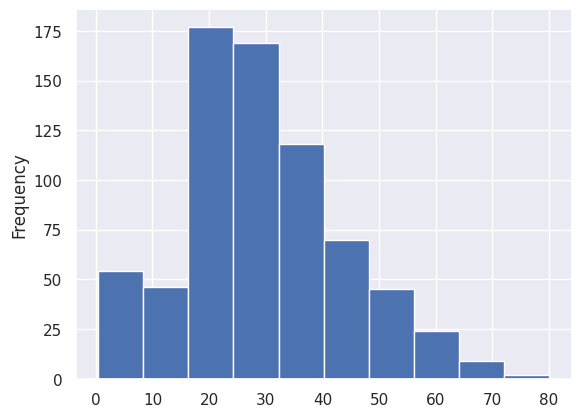

In [5]:
train["Age"].plot.hist();

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Data Descriptions

**Survival:** 0 = No, 1 = Yes \
**SibSp:** number of siblings/spouses aboard the Titanic \
**Parch:** number of parents/children aboard the Titanic \
**Embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


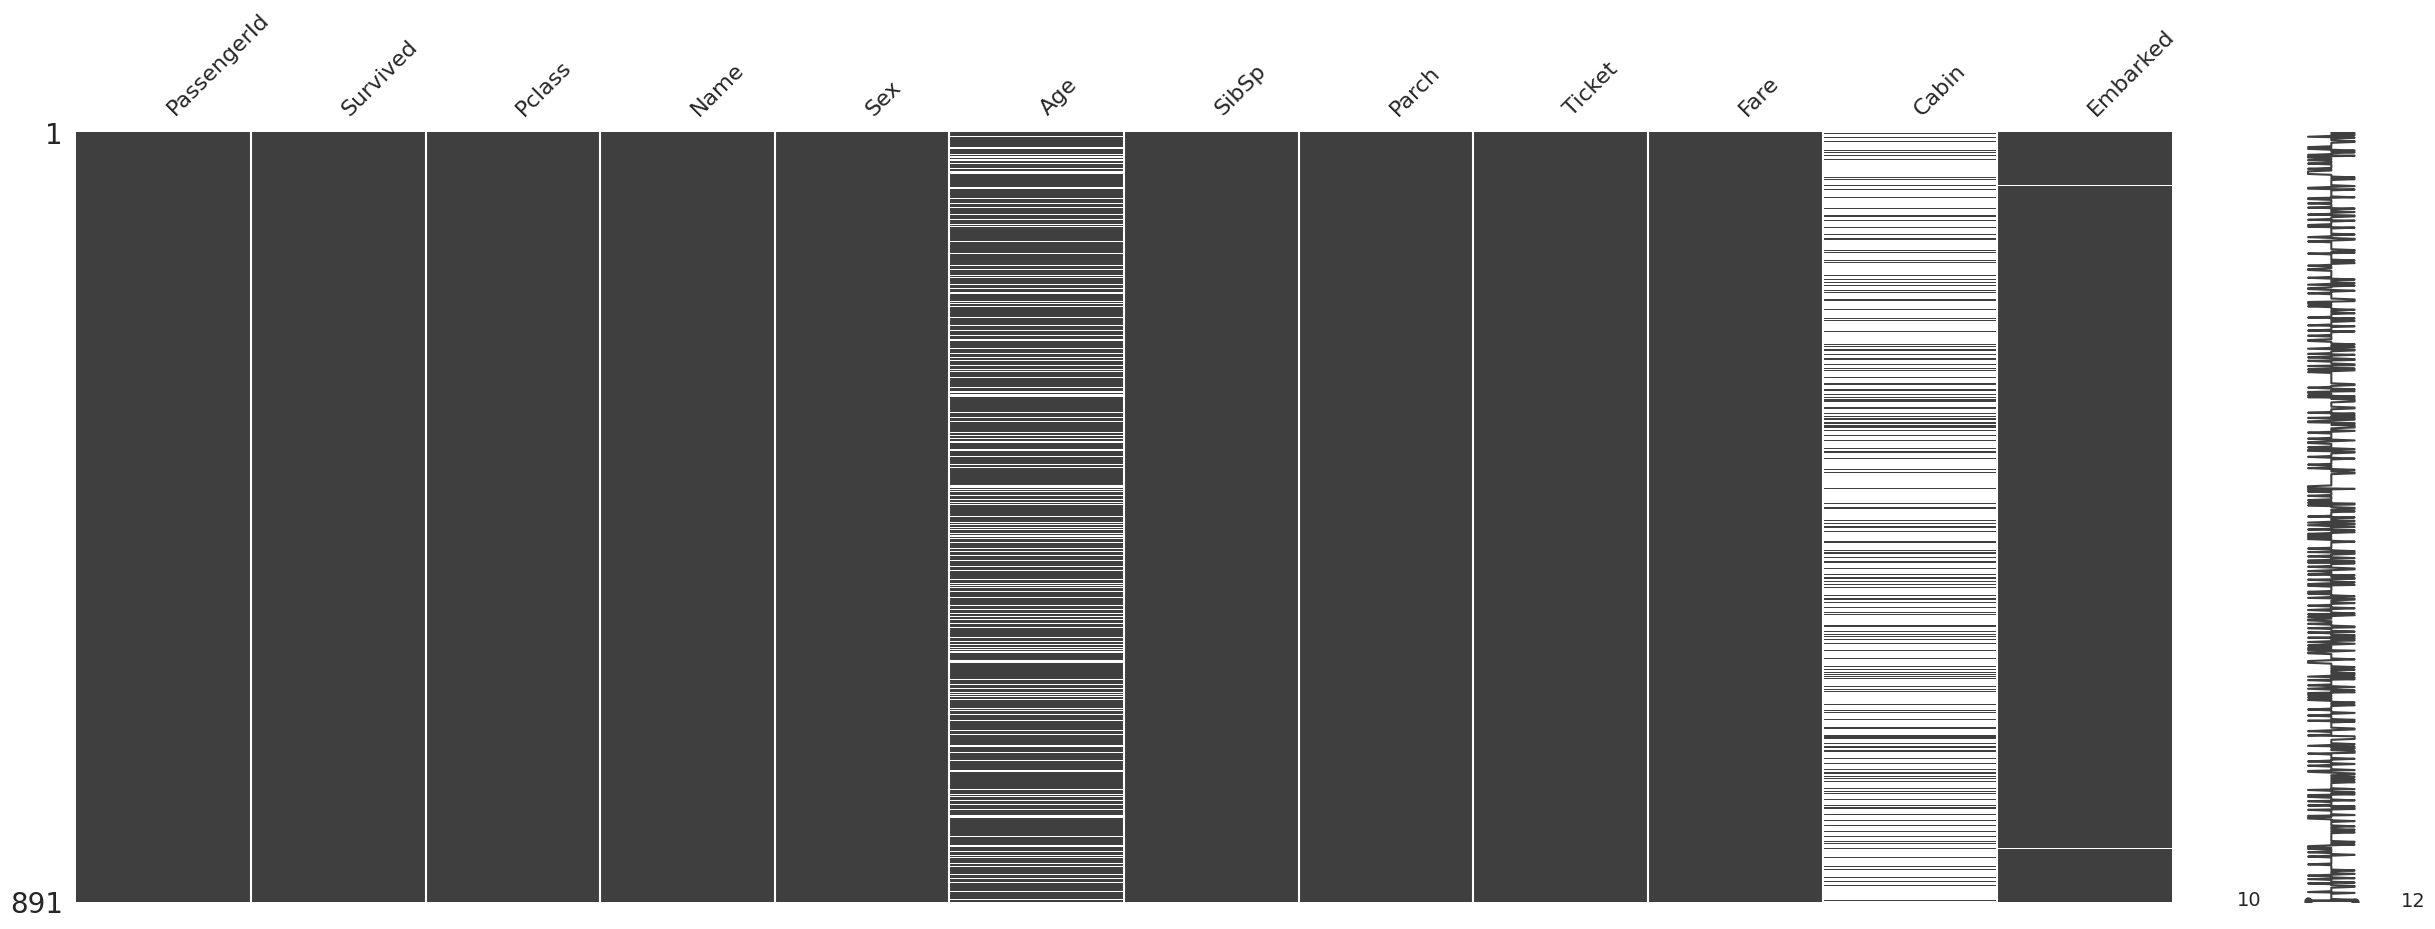

In [9]:
# Visual of missing data
missingno.matrix(train, figsize = (30, 10));

In [10]:
# another way to see missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Analysis

In [11]:
# look at discrete and continuous variables
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

A rule of thumb: features with a datatype of object are categorical, while floats or ints are numerical \
That being said, with further digging, some numerical data would actually be categorical

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
train.size

10692

### Target Feature: Survived
This is the prediction variable

Survived
0    549
1    342
Name: count, dtype: int64


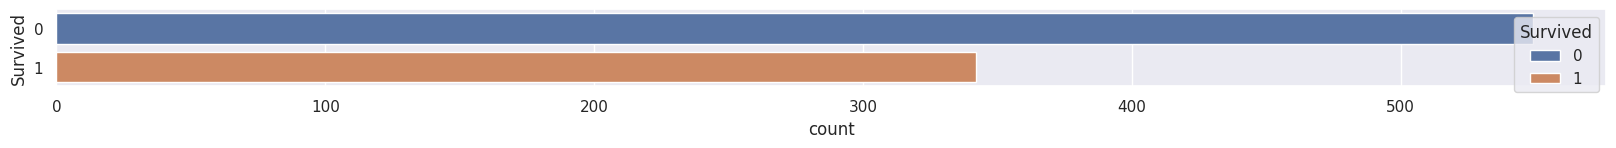

In [14]:
# How many people survived?
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='Survived', data=train, hue='Survived');
print(train['Survived'].value_counts())

In [15]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [16]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [17]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

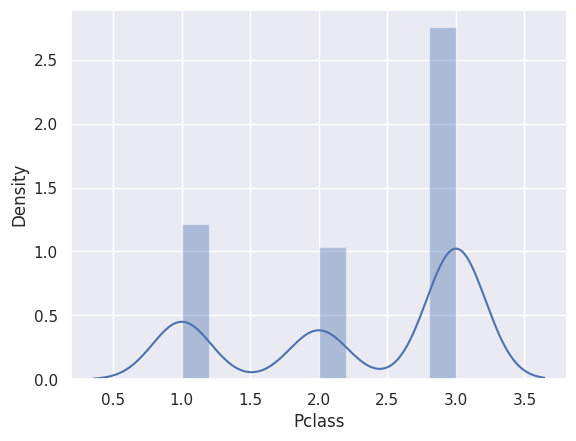

In [18]:
# Understand the distribution across the dataset
sns.distplot(train['Pclass']);

In [19]:
train['Pclass'].isnull().sum()

np.int64(0)

In [20]:
# since there are no missing values, it is fine to add it to both dataframes
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Sex

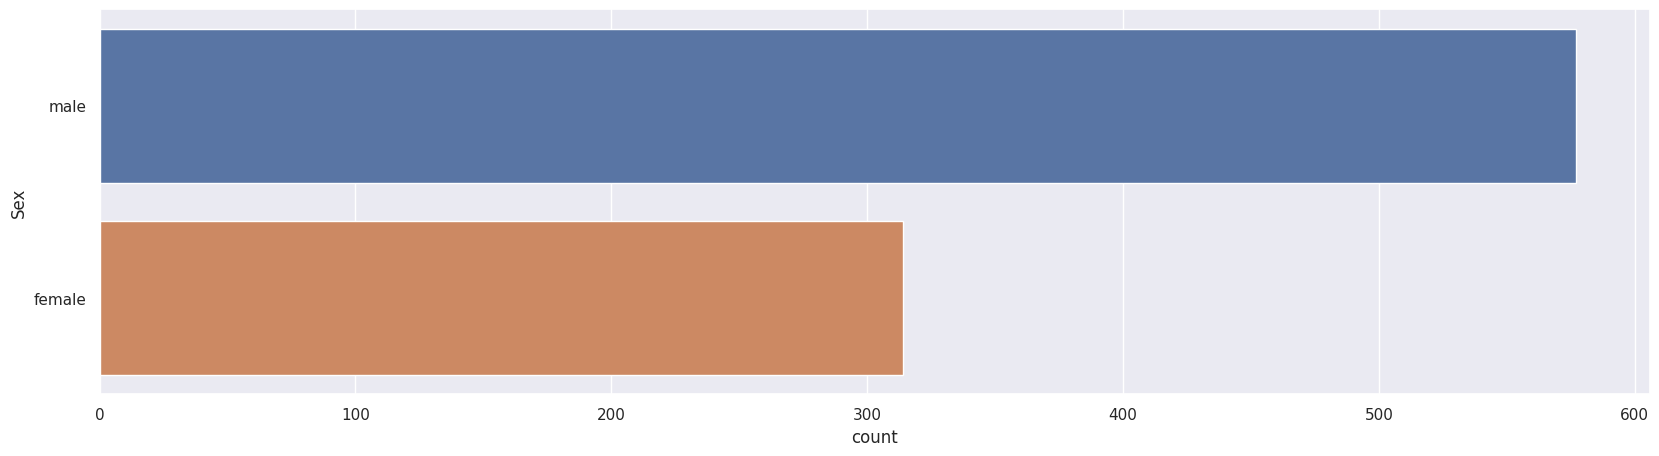

In [21]:
# visualize the distribution of sex
plt.figure(figsize=(20, 5))
sns.countplot(y='Sex', data=train, hue='Sex');

In [22]:
train['Sex'].isnull().sum()

np.int64(0)

In [23]:
# add sex to the dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [24]:
df_bin.loc[df_bin['Survived'] == 1]['Sex']

1      1
2      1
3      1
8      1
9      1
      ..
875    1
879    1
880    1
887    1
889    0
Name: Sex, Length: 342, dtype: int64

In [25]:
df_bin[df_bin['Survived'] == 1]['Sex']

1      1
2      1
3      1
8      1
9      1
      ..
875    1
879    1
880    1
887    1
889    0
Name: Sex, Length: 342, dtype: int64

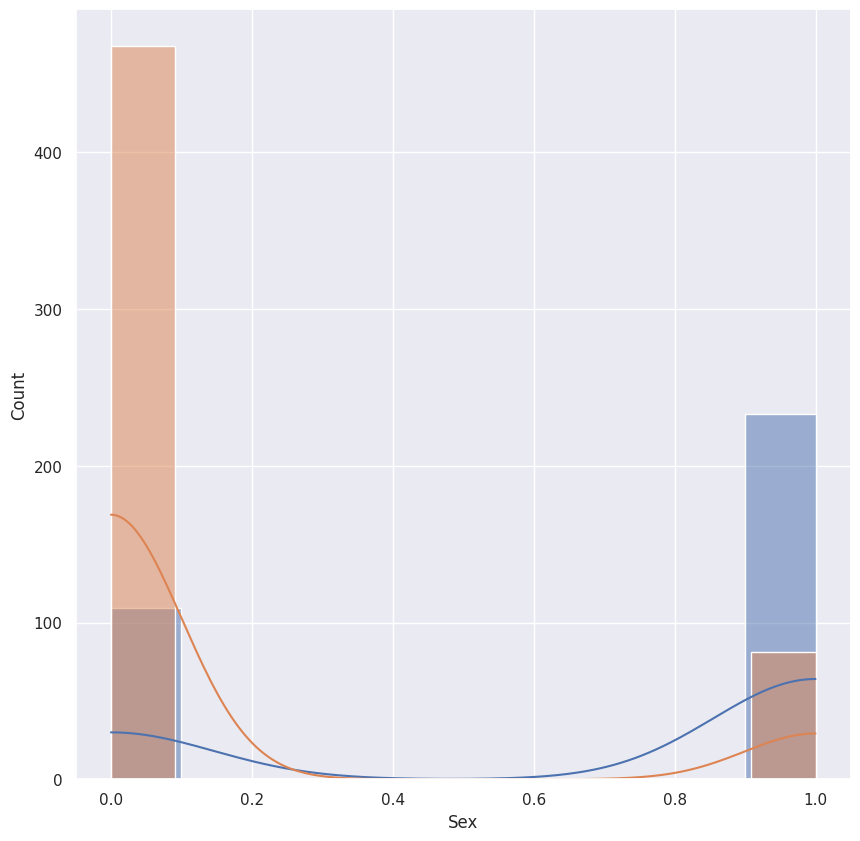

In [26]:
# how does the sex variable look compared to survival?
fig = plt.figure(figsize=(10, 10))
# sns.histplot(df_bin[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.histplot(df_bin[df_bin['Survived'] == 1]['Sex'], kde=True);
sns.histplot(df_bin[df_bin['Survived'] == 0]['Sex'], kde=True);

### Feature: Age

In [27]:
train['Age'].isnull().sum()

np.int64(177)

In [28]:
# this is a lot of missing data, so hold off on adding it to the dataframes

#### Create a function for a count and distribution visualizations

In [29]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(15, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        sns.countplot(ax=axes[0], y=target_column, data=bin_df, hue=target_column);
        sns.histplot(ax=axes[1], data=data, x=target_column,
                    kde=True, hue=label_column);
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        sns.countplot(ax=axes[0], y=target_column, data=data, hue=target_column);
        sns.histplot(ax=axes[1], data=data, x=target_column,
                    kde=True, hue=label_column);

### Feature: SibSp

In [30]:
# How many missing values?
train['SibSp'].isnull().sum()

np.int64(0)

In [31]:
# what values are there?
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [32]:
# add values to dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

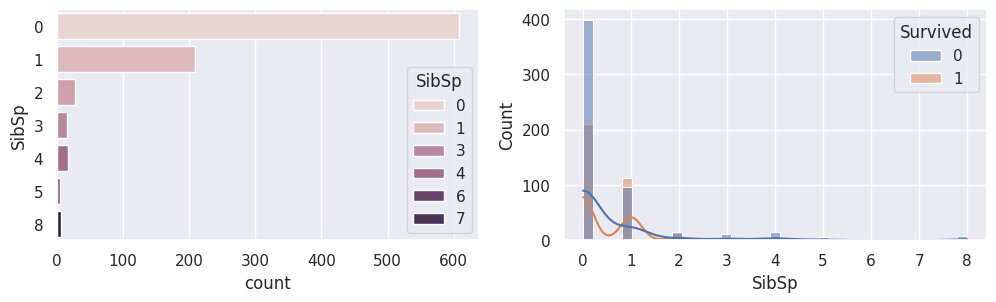

In [33]:
# visualize the data with function
plot_count_dist(train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='SibSp',
               figsize=(12, 3))

### Feature: Parch

In [34]:
train['Parch'].isnull().sum()

np.int64(0)

In [35]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [36]:
# add Parch to dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

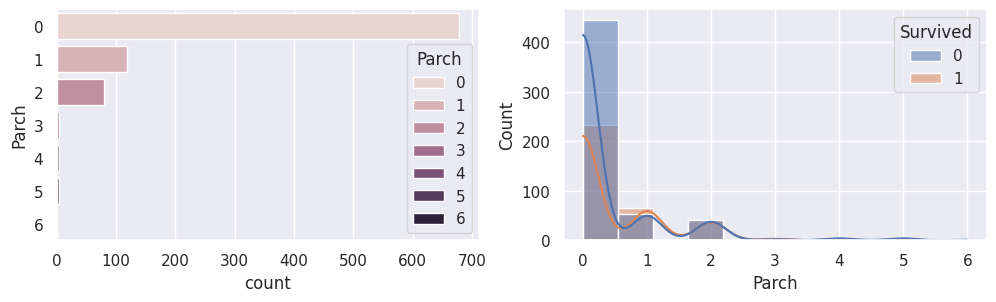

In [37]:
# visualize the Parch data
plot_count_dist(train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='Parch',
               figsize=(12, 3))

### Feature: Ticket

In [38]:
train['Ticket'].isnull().sum()

np.int64(0)

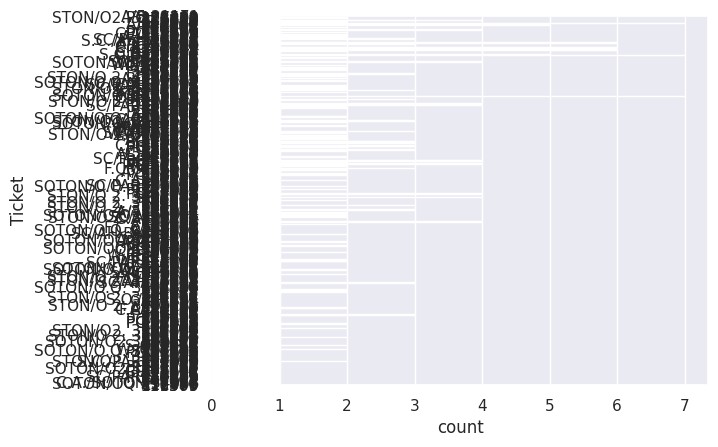

In [39]:
# how many kinds of tickets are there?
sns.countplot(data=train, y='Ticket', hue='Ticket');

In [40]:
train['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [41]:
unique_tickets = len(train['Ticket'].unique())
print(f"There are {unique_tickets} unique Ticket values")

There are 681 unique Ticket values


This is too many unique ticket values so we will keep out for now

### Feature: Fare

In [42]:
train['Fare'].isnull().sum()

np.int64(0)

<Axes: xlabel='count', ylabel='Fare'>

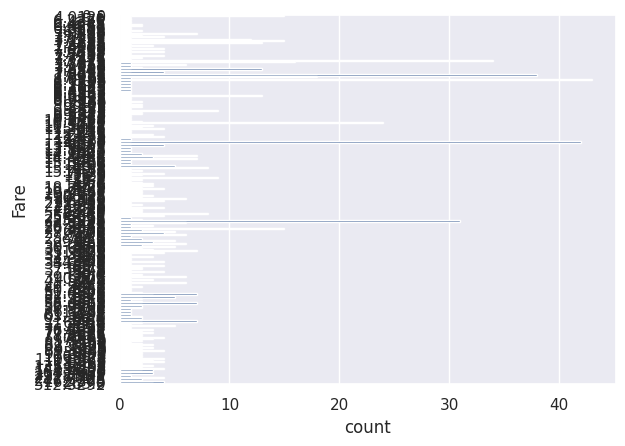

In [43]:
sns.countplot(data=train, y='Fare');

In [44]:
train['Fare'].dtype

dtype('float64')

In [46]:
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [47]:
df_bin['Fare'].value_counts()

Fare
(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: count, dtype: int64

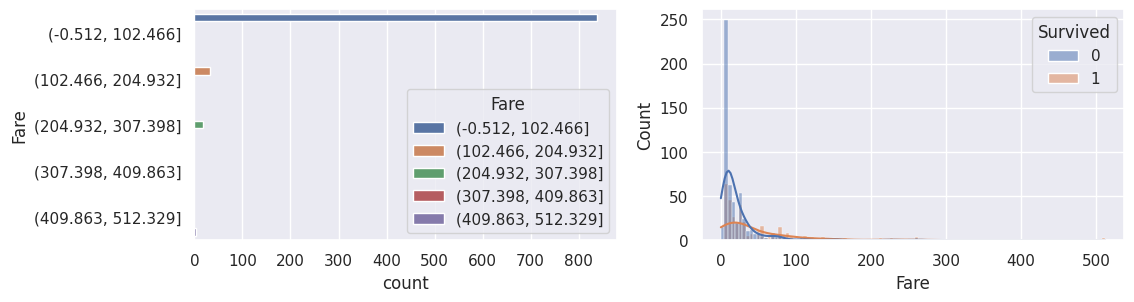

In [48]:
# visualize the bin counts
plot_count_dist(data=train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='Fare',
               figsize=(12, 3),
               use_bin_df=True)

### Feature: Cabin

In [49]:
train['Cabin'].isnull().sum()

np.int64(687)

In [50]:
# too many missing values to include in dataframes

### Feature: Embarked

In [51]:
train['Embarked'].isnull().sum()

np.int64(2)

In [52]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

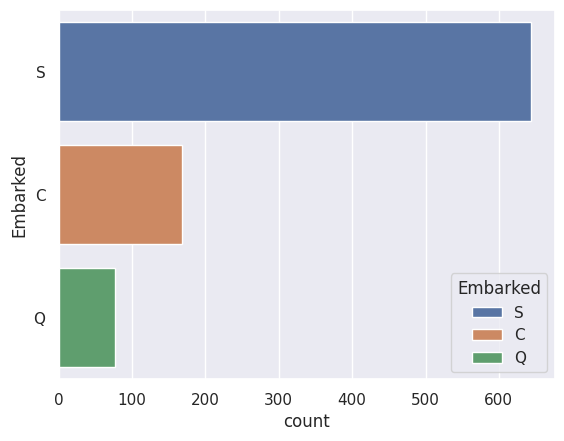

In [55]:
# visualize counts
sns.countplot(data=train, y='Embarked', hue='Embarked');

In [56]:
# add Embarked to dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [57]:
# remove rows with missing Embarked values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


### Feature Encoding

In [58]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [59]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,False,False,True,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,1,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1,False,False,True,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,1,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,False,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [60]:
one_hot_cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [61]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'],
                                    prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'],
                               prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_con['Pclass'],
                                  prefix='pclass')

In [62]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con,
                       df_embarked_one_hot,
                       df_sex_one_hot,
                       df_pclass_one_hot], axis=1)

# drop the original categorical columns (because now they have been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [63]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,False,False,True,False,True,False,False,True
1,1,1,0,71.2833,True,False,False,True,False,True,False,False
2,1,0,0,7.9250,False,False,True,True,False,False,False,True
3,1,1,0,53.1000,False,False,True,True,False,True,False,False
4,0,0,0,8.0500,False,False,True,False,True,False,False,True
5,0,0,0,8.4583,False,True,False,False,True,False,False,True
6,0,0,0,51.8625,False,False,True,False,True,True,False,False
7,0,3,1,21.0750,False,False,True,False,True,False,False,True
8,1,0,2,11.1333,False,False,True,True,False,False,False,True
9,1,1,0,30.0708,True,False,False,True,False,False,True,False


### Start Building Machine Learning Models